In [99]:
import pandas as pd


In [100]:
df = pd.read_csv("JSVulnerabilityDataSet-1.0.csv")

In [101]:
df.columns


Index(['name', 'longname', 'path', 'full_repo_path', 'line', 'column',
       'endline', 'endcolumn', 'CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'McCC',
       'NL', 'NLE', 'CD', 'CLOC', 'DLOC', 'TCD', 'TCLOC', 'LLOC', 'LOC', 'NOS',
       'NUMPAR', 'TLLOC', 'TLOC', 'TNOS', 'HOR_D', 'HOR_T', 'HON_D', 'HON_T',
       'HLEN', 'HVOC', 'HDIFF', 'HVOL', 'HEFF', 'HBUGS', 'HTIME', 'CYCL',
       'PARAMS', 'CYCL_DENS', 'Vuln'],
      dtype='object')

In [102]:
X = df[[ 'CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'McCC',
         'NL', 'NLE', 'CD', 'CLOC', 'DLOC', 'TCD', 'TCLOC',
         'LLOC', 'LOC', 'NOS','NUMPAR', 'TLLOC', 'TLOC',
         'TNOS', 'HOR_D', 'HOR_T', 'HON_D', 'HON_T',
         'HLEN', 'HVOC', 'HDIFF', 'HVOL', 'HEFF',
         'HBUGS', 'HTIME', 'CYCL',  'PARAMS',
         'CYCL_DENS']].values

In [103]:
y = df['Vuln']

In [104]:

#1 KNN

from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn = KNeighborsClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)
parameter={'n_neighbors': np.arange(2, 10, 1)}

knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf)

accuracy = cross_val_score(knn_cv, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(knn_cv, X, y, cv=kf, scoring='recall')
precision = cross_val_score(knn_cv, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(knn_cv, X, y, cv=kf, scoring='f1')

accuracy_mean1 = accuracy.mean()
recall_mean1 = recall.mean()
precision_mean1 = precision.mean()
f1_mean1 = f1.mean()

print("Mean accuracy score:", accuracy_mean1)
print("Mean recall score:", recall_mean1)
print("Mean precision score:", precision_mean1)
print("Mean F1 score:", f1_mean1)
print('########')

knn_cv.fit(X_train, y_train, )
print('########')
print("Predictions from the classifier:")
print('########')
test_data_predicted1 = knn_cv.predict(X_test)


print("Accuracy predict: ", accuracy_score(test_data_predicted1, y_test))
print("Recall predict: ", recall_score(test_data_predicted1, y_test))
print("Precision predict: ", precision_score(test_data_predicted1, y_test))
print("F1 predict: ", f1_score(test_data_predicted1, y_test))


Mean accuracy score: 0.9396287196732864
Mean recall score: 0.5572982736102302
Mean precision score: 0.9222647785417021
Mean F1 score: 0.6931351502084324
########
########
Predictions from the classifier:
########
Accuracy predict:  0.9331958762886597
Recall predict:  0.8876404494382022
Precision predict:  0.5266666666666666
F1 predict:  0.6610878661087866


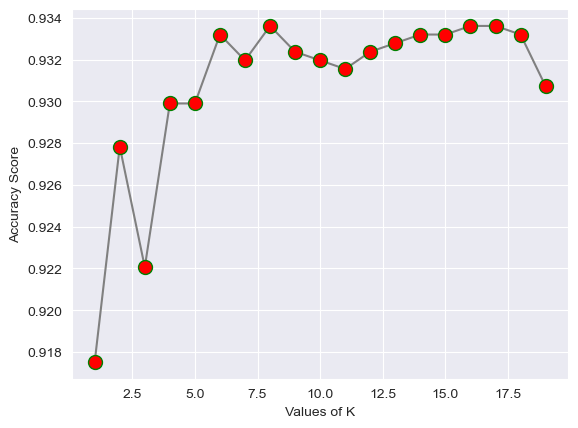

In [105]:
import matplotlib.pyplot as plt

normal_accuracy = []
k_values = range(1,20)

for k in k_values :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_data_predicted = knn.predict(X_test)
    accur = accuracy_score(test_data_predicted, y_test)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="grey",marker="o",ms=10,mfc ='red', mec="green")
plt.xlabel("Values of K")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.show()

In [106]:
#2 Decision tree

from sklearn import tree

tree = tree.DecisionTreeClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)


accuracy = cross_val_score(tree, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(tree, X, y, cv=kf, scoring='recall')
precision = cross_val_score(tree, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(tree, X, y, cv=kf, scoring='f1')


accuracy_mean2 = accuracy.mean()
recall_mean2 = recall.mean()
precision_mean2 = precision.mean()
f1_mean2 = f1.mean()



print("Mean accuracy score: ", accuracy_mean2)
print("Mean recall score: ", recall_mean2)
print("Mean precision score: ", precision_mean2)
print("Mean F1 score: ", f1_mean2)


tree.fit(X_train, y_train)
print('########')
print("Predictions from the classifier:")
print('########')
test_data_predicted2 = tree.predict(X_test)

print("Accuracy predict: ", accuracy_score(test_data_predicted2, y_test))
print("Recall predict: ", recall_score(test_data_predicted2, y_test))
print("Precision predict: ", precision_score(test_data_predicted2, y_test))
print("F1 predict: ", f1_score(test_data_predicted2, y_test))

Mean accuracy score:  0.930474317011256
Mean recall score:  0.6899724102206071
Mean precision score:  0.7311908348052458
Mean F1 score:  0.709535760378728
########
Predictions from the classifier:
########
Accuracy predict:  0.9270103092783505
Recall predict:  0.7303370786516854
Precision predict:  0.65
F1 predict:  0.6878306878306878


In [107]:
# 3 SVM
from sklearn.svm import SVC

svc = SVC(gamma='auto')

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = cross_val_score(svc, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(svc, X, y, cv=kf, scoring='recall')
precision = cross_val_score(svc, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(svc, X, y, cv=kf, scoring='f1')

accuracy_mean3 = accuracy.mean()
recall_mean3 = recall.mean()
precision_mean3 = precision.mean()
f1_mean3 = f1.mean()


print("Mean accuracy score: ", accuracy_mean3)
print("Mean recall score: ", recall_mean3)
print("Mean precision score: ", precision_mean3)
print("Mean F1 score: ", f1_mean3)

svc.fit(X_train, y_train)
print('########')
print("Predictions from the classifier:")
print('########')
test_data_predicted3 = svc.predict(X_test)

print("Accuracy predict: ", accuracy_score(test_data_predicted3, y_test))
print("Recall predict: ", recall_score(test_data_predicted3, y_test))
print("Precision predict: ", precision_score(test_data_predicted3, y_test))
print("F1 predict: ", f1_score(test_data_predicted3, y_test))


Mean accuracy score:  0.9461443547487478
Mean recall score:  0.6043480242180894
Mean precision score:  0.9391844968158104
Mean F1 score:  0.7341395180408506
########
Predictions from the classifier:
########
Accuracy predict:  0.9402061855670103
Recall predict:  0.918918918918919
Precision predict:  0.5666666666666667
F1 predict:  0.7010309278350515


In [108]:
#4 Naive Bayes 

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = cross_val_score(gnb, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(gnb, X, y, cv=kf, scoring='recall')
precision = cross_val_score(gnb, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(gnb, X, y, cv=kf, scoring='f1')

accuracy_mean4 = accuracy.mean()
recall_mean4 = recall.mean()
precision_mean4 = precision.mean()
f1_mean4 = f1.mean()

print("Mean accuracy score: ", accuracy_mean4)
print("Mean recall score: ", recall_mean4)
print("Mean precision score: ", precision_mean4)
print("Mean F1 score: ", f1_mean4)

gnb.fit(X_train, y_train)

print('########')
print("Predictions from the classifier:")
print('########')

test_data_predicted4 = gnb.predict(X_test)

print("Accuracy predict: ", accuracy_score(test_data_predicted4, y_test))
print("Recall predict: ", recall_score(test_data_predicted4, y_test))
print("Precision predict: ", precision_score(test_data_predicted4, y_test))
print("F1 predict: ", f1_score(test_data_predicted4, y_test))

Mean accuracy score:  0.8498142374006568
Mean recall score:  0.1026817963190014
Mean precision score:  0.2459669239931427
Mean F1 score:  0.14445240897479872
########
Predictions from the classifier:
########
Accuracy predict:  0.8511340206185567
Recall predict:  0.2896551724137931
Precision predict:  0.14
F1 predict:  0.18876404494382024


In [109]:
#5 Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=10000)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(lr, X, y, cv=kf, scoring='recall')
precision = cross_val_score(lr, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(lr, X, y, cv=kf, scoring='f1')

accuracy_mean5 = accuracy.mean()
recall_mean5 = recall.mean()
precision_mean5 = precision.mean()
f1_mean5 = f1.mean()

print("Mean accuracy score: ", accuracy_mean5)
print("Mean recall score: ", recall_mean5)
print("Mean precision score: ", precision_mean5)
print("Mean F1 score: ", f1_mean5)

lr.fit(X_train, y_train)

print('########')
print("Predictions from the classifier:")
print('########')

test_data_predicted5 = lr.predict(X_test)

print("Accuracy predict: ", accuracy_score(test_data_predicted5, y_test))
print("Recall predict: ", recall_score(test_data_predicted5, y_test))
print("Precision predict: ", precision_score(test_data_predicted5, y_test))
print("F1 predict: ", f1_score(test_data_predicted5, y_test))

Mean accuracy score:  0.9068036317234363
Mean recall score:  0.29872947060481286
Mean precision score:  0.8464910213005454
Mean F1 score:  0.44018722836235036
########
Predictions from the classifier:
########
Accuracy predict:  0.9092783505154639
Recall predict:  0.8571428571428571
Precision predict:  0.32
F1 predict:  0.4660194174757282


In [110]:
#5 Random Forest

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(rf, X, y, cv=kf, scoring='recall')
precision = cross_val_score(rf, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(rf, X, y, cv=kf, scoring='f1')

accuracy_mean6 = accuracy.mean()
recall_mean6 = recall.mean()
precision_mean6 = precision.mean()
f1_mean6 = f1.mean()

print("Mean accuracy score: ", accuracy_mean6)
print("Mean recall score: ", recall_mean6)
print("Mean precision score: ", precision_mean6)
print("Mean F1 score: ", f1_mean6)

rf.fit(X_train, y_train)

print('########')
print("Predictions from the classifier:")
print('########')

test_data_predicted5 = rf.predict(X_test)

print("Accuracy predict: ", accuracy_score(test_data_predicted5, y_test))
print("Recall predict: ", recall_score(test_data_predicted5, y_test))
print("Precision predict: ", precision_score(test_data_predicted5, y_test))
print("F1 predict: ", f1_score(test_data_predicted5, y_test))

Mean accuracy score:  0.9502671145102968
Mean recall score:  0.6804171074504414
Mean precision score:  0.8910041856876632
Mean F1 score:  0.7704953640785879
########
Predictions from the classifier:
########
Accuracy predict:  0.9451546391752578
Recall predict:  0.8778280542986425
Precision predict:  0.6466666666666666
F1 predict:  0.744721689059501


In [111]:
#7 stacking knn rf
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
       ('rf', RandomForestClassifier(random_state=42)),
       ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier())) ]

stack_classifier = StackingClassifier(estimators=estimators)

kf = KFold(n_splits=2, shuffle=True, random_state=42)

accuracy = cross_val_score(stack_classifier, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(stack_classifier, X, y, cv=kf, scoring='recall')
precision = cross_val_score(stack_classifier, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(stack_classifier, X, y, cv=kf, scoring='f1')

accuracy_mean7 = accuracy.mean()
recall_mean7 = recall.mean()
precision_mean7 = precision.mean()
f1_mean7 = f1.mean()

print("Mean accuracy score: ", accuracy_mean7)
print("Mean recall score: ", recall_mean7)
print("Mean precision score: ", precision_mean7)
print("Mean F1 score: ", f1_mean7)

Mean accuracy score:  0.9416083830654625
Mean recall score:  0.5647453083109919
Mean precision score:  0.9395342144955148
Mean F1 score:  0.7040240293791482


In [112]:
#8 GB-Boost

from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = cross_val_score(gb, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(gb, X, y, cv=kf, scoring='recall')
precision = cross_val_score(gb, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(gb, X, y, cv=kf, scoring='f1')

accuracy_mean8 = accuracy.mean()
recall_mean8 = recall.mean()
precision_mean8 = precision.mean()
f1_mean8 = f1.mean()

print("Mean accuracy score: ", accuracy_mean8)
print("Mean recall score: ", recall_mean8)
print("Mean precision score: ", precision_mean8)
print("Mean F1 score: ", f1_mean8)

gb.fit(X_train, y_train)

print('########')
print("Predictions from the classifier:")
print('########')

test_data_predicted8 = gb.predict(X_test)

print("Accuracy predict: ", accuracy_score(test_data_predicted8, y_test))
print("Recall predict: ", recall_score(test_data_predicted8, y_test))
print("Precision predict: ", precision_score(test_data_predicted8, y_test))
print("F1 predict: ", f1_score(test_data_predicted8, y_test))

Mean accuracy score:  0.9430926377880986
Mean recall score:  0.5757403148597945
Mean precision score:  0.9383606700241277
Mean F1 score:  0.7124118191797554
########
Predictions from the classifier:
########
Accuracy predict:  0.9364948453608247
Recall predict:  0.9055555555555556
Precision predict:  0.5433333333333333
F1 predict:  0.6791666666666667


In [113]:
#9 XG-Boost

import xgboost as xgb

xgbb = xgb.XGBClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = cross_val_score(xgbb, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(xgbb, X, y, cv=kf, scoring='recall')
precision = cross_val_score(xgbb, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(xgbb, X, y, cv=kf, scoring='f1')

accuracy_mean9 = accuracy.mean()
recall_mean9 = recall.mean()
precision_mean9 = precision.mean()
f1_mean9 = f1.mean()

print("Mean accuracy score: ", accuracy_mean9)
print("Mean recall score: ", recall_mean9)
print("Mean precision score: ", precision_mean9)
print("Mean F1 score: ", f1_mean9)

xgbb.fit(X_train, y_train)

print('########')
print("Predictions from the classifier:")
print('########')

test_data_predicted9 = xgbb.predict(X_test)

print("Accuracy predict: ", accuracy_score(test_data_predicted9, y_test))
print("Recall predict: ", recall_score(test_data_predicted9, y_test))
print("Precision predict: ", precision_score(test_data_predicted9, y_test))
print("F1 predict: ", f1_score(test_data_predicted9, y_test))

Mean accuracy score:  0.9485360057027961
Mean recall score:  0.6630752624231551
Mean precision score:  0.8929495543073378
Mean F1 score:  0.7597080393394753
########
Predictions from the classifier:
########
Accuracy predict:  0.9422680412371134
Recall predict:  0.8738317757009346
Precision predict:  0.6233333333333333
F1 predict:  0.7276264591439688


In [114]:
#10 AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = cross_val_score(ada, X, y, cv=kf, scoring='accuracy')
recall = cross_val_score(ada, X, y, cv=kf, scoring='recall')
precision = cross_val_score(ada, X, y, cv=kf, scoring='precision')
f1 = cross_val_score(ada, X, y, cv=kf, scoring='f1')

accuracy_mean10 = accuracy.mean()
recall_mean10 = recall.mean()
precision_mean10 = precision.mean()
f1_mean10 = f1.mean()

print("Mean accuracy score: ", accuracy_mean10)
print("Mean recall score: ", recall_mean10)
print("Mean precision score: ", precision_mean10)
print("Mean F1 score: ", f1_mean10)

ada.fit(X_train, y_train)

print('########')
print("Predictions from the classifier:")
print('########')

test_data_predicted10 = ada.predict(X_test)

print("Accuracy predict: ", accuracy_score(test_data_predicted10, y_test))
print("Recall predict: ", recall_score(test_data_predicted10, y_test))
print("Precision predict: ", precision_score(test_data_predicted10, y_test))
print("F1 predict: ", f1_score(test_data_predicted10, y_test))

Mean accuracy score:  0.9364944944618123
Mean recall score:  0.5256626586271922
Mean precision score:  0.9254868334108336
Mean F1 score:  0.6682664019278513
########
Predictions from the classifier:
########
Accuracy predict:  0.9298969072164949
Recall predict:  0.9166666666666666
Precision predict:  0.4766666666666667
F1 predict:  0.6271929824561404


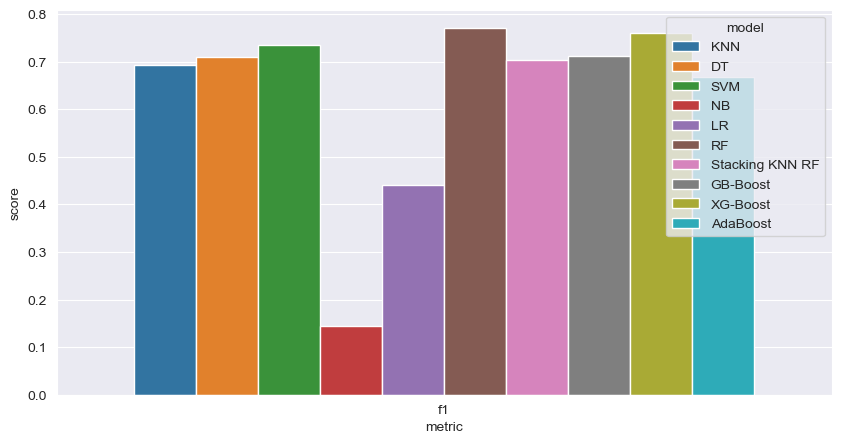

In [115]:
import seaborn as sns

data = {
    'model': ['KNN', 'DT', 'SVM', 'NB', 'LR', 'RF', 'Stacking KNN RF', 'GB-Boost', 'XG-Boost', 'AdaBoost'],
    'f1': [f1_mean1, f1_mean2, f1_mean3, f1_mean4, f1_mean5, f1_mean6, f1_mean7, f1_mean8, f1_mean9, f1_mean10 ]   
}

df = pd.DataFrame(data)
df_l = pd.melt(df, id_vars='model', var_name='metric', value_name='value')

plt.figure(figsize=(10, 5))
sns.barplot(data=df_l, x='metric', y='value', hue='model')
plt.ylabel('score')
plt.show()
